In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [228]:
installs = pd.read_csv('installs.csv.gzip', compression = 'gzip', dtype ={'device_language' : 'str'})

In [229]:
installs.loc[:,'created'] = pd.to_datetime(installs['created'], errors = 'coerce')
del installs['click_hash'] #borrada por ser todos NaN
del installs['attributed'] #borrada por ser todos False, no aporta información
del installs['trans_id']   #borrada por tener muy pocos datos (6 de 3412)
del installs['event_uuid'] #borrada por tener todos valores distintos, no aporta información relevante
del installs['ref_hash']   #borrada por tener todos valores distintos, no aporta información relevante
del installs['session_user_agent'] #borrada porque desde jampp mismo dijeron que no es relevante

In [230]:
installs['kind'].replace('open', 'Open', inplace = True) #Reemplazo porque son la misma opción
installs['kind'].replace(['EVENT_HOMEPAGE', 'EVENT_Homepage'], 'Event Homepage', inplace = True)

In [231]:
installs.head()

,created,application_id,ref_type,implicit,device_countrycode,device_brand,device_model,user_agent,kind,wifi,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,True,6333597102633388268,5.137992e+17,6.026543e+18,NaN,Open,NaN,4636407223847323867,3.3013777759776993e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,True,6333597102633388268,1.083369e+18,7.876612e+18,NaN,Open,NaN,685400811232710215,3.3013777759776993e+18


In [232]:
installs.count()

created               3412
application_id        3412
ref_type              3412
implicit              3412
device_countrycode    3412
device_brand          1047
device_model          3411
user_agent            1729
kind                   865
wifi                  1729
ip_address            3412
device_language       3378
dtype: int64

In [233]:
installs.dtypes

created               datetime64[ns]
application_id                 int64
ref_type                       int64
implicit                        bool
device_countrycode             int64
device_brand                 float64
device_model                 float64
user_agent                    object
kind                          object
wifi                          object
ip_address                     int64
device_language               object
dtype: object

In [ ]:
installs[installs['']]

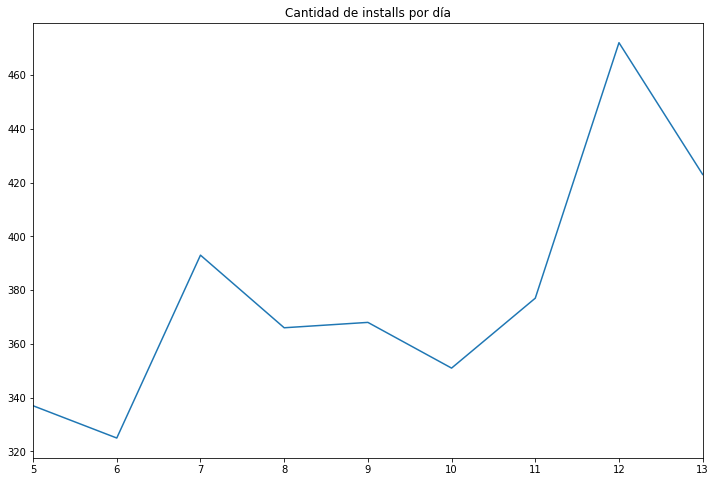

In [234]:
installs['created'].dt.day.value_counts().sort_index().plot(figsize = (12,8), title = 'Cantidad de installs por día')
plt.show()

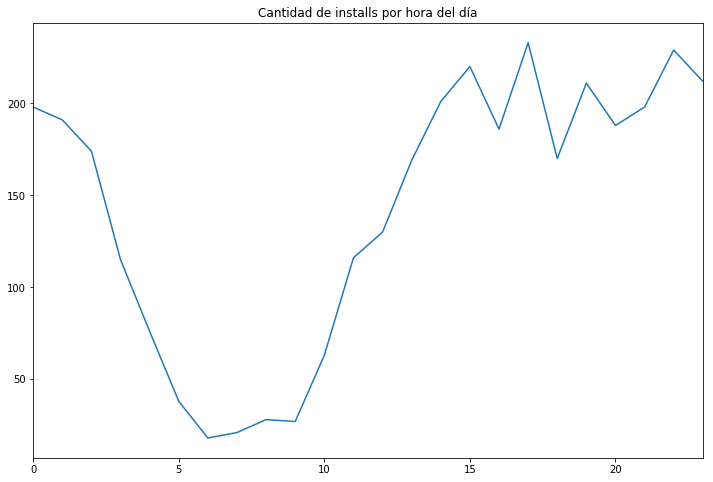

In [235]:
installs['created'].dt.hour.value_counts().sort_index().plot(figsize = (12,8), title = 'Cantidad de installs por hora del día')
plt.show()

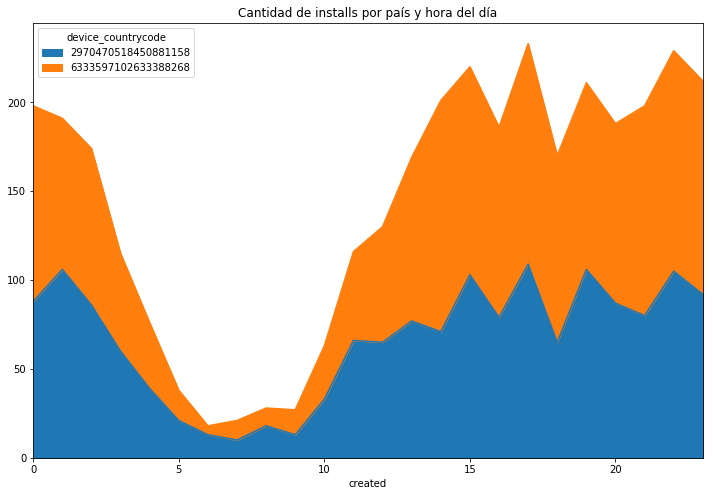

In [236]:
paises = installs[['created', 'device_countrycode']].groupby(installs['created'].dt.hour).agg({'device_countrycode' : 'value_counts'})
paises['device_countrycode'].unstack().plot.area(figsize = (12,8), title = 'Cantidad de installs por país y hora del día')
plt.show()

In [237]:
otherapps = installs
counts = otherapps['application_id'].value_counts()
indexes = counts[counts<90].index
mask_dict = dict.fromkeys(indexes, 'other')
otherapps['application_id'] = otherapps['application_id'].replace(mask_dict)

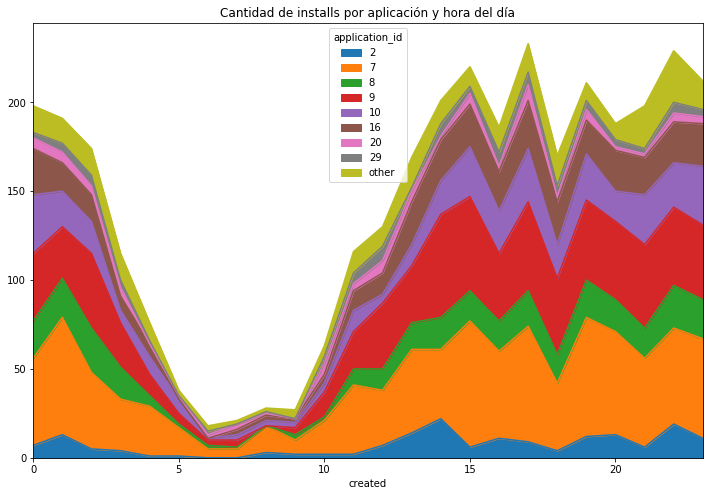

In [238]:
aplicaciones = otherapps[['created', 'application_id']].groupby(otherapps['created'].dt.hour).agg({'application_id' : 'value_counts'})
aplicaciones['application_id'].unstack().plot.area(figsize = (12,8), title = 'Cantidad de installs por aplicación y hora del día')
plt.show()

In [281]:
user_agents = installs[installs['user_agent'].notnull()]
user_agents.loc[user_agents['user_agent'].str.contains('Dalvik'), 'user_agent'] = 'Dalvik'
user_agents.loc[user_agents['user_agent'].str.contains('MercadoPago'), 'user_agent'] = 'MercadoPago'
user_agents.loc[user_agents['user_agent'].str.contains('HotelUrbano'), 'user_agent'] = 'HotelUrbano'
user_agents.loc[user_agents['user_agent'].str.contains('NextGen'), 'user_agent'] = 'NextGen'
user_agents.loc[user_agents['user_agent'].str.contains('PeixeUrbano'), 'user_agent'] = 'Peixeurbano'
user_agents.loc[user_agents['user_agent'].str.contains('Mozilla'), 'user_agent'] = 'Mozilla'
user_agents.loc[user_agents['user_agent'].str.contains('takealot'), 'user_agent'] = 'takealot'

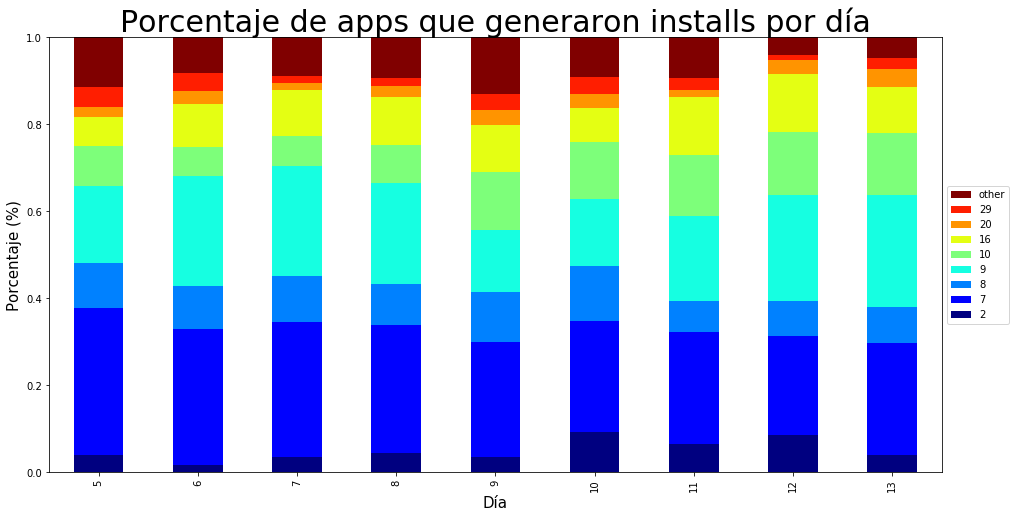

In [277]:
gy = pd.DataFrame(installs.groupby([(installs['created'].dt.day), 'application_id']).size())
gy.columns = ['cant']
gy.reset_index(inplace = True)
pivoted = pd.pivot_table(gy,values='cant',columns='application_id', index='created')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)
pivoted.columns = ['2', '7','8','9','10','16', '20', '29', 'other']
f = plt.figure()
plt.title('Porcentaje de apps que generaron installs por día',size=30)
ax = pivoted.plot(kind='bar', stacked=True,figsize=(16,8),ax=f.gca(),colormap='jet')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Porcentaje (%)', size = 15);
ax.set_xlabel('Día', size = 15);
ax.set_ylim(0,1)
plt.show()

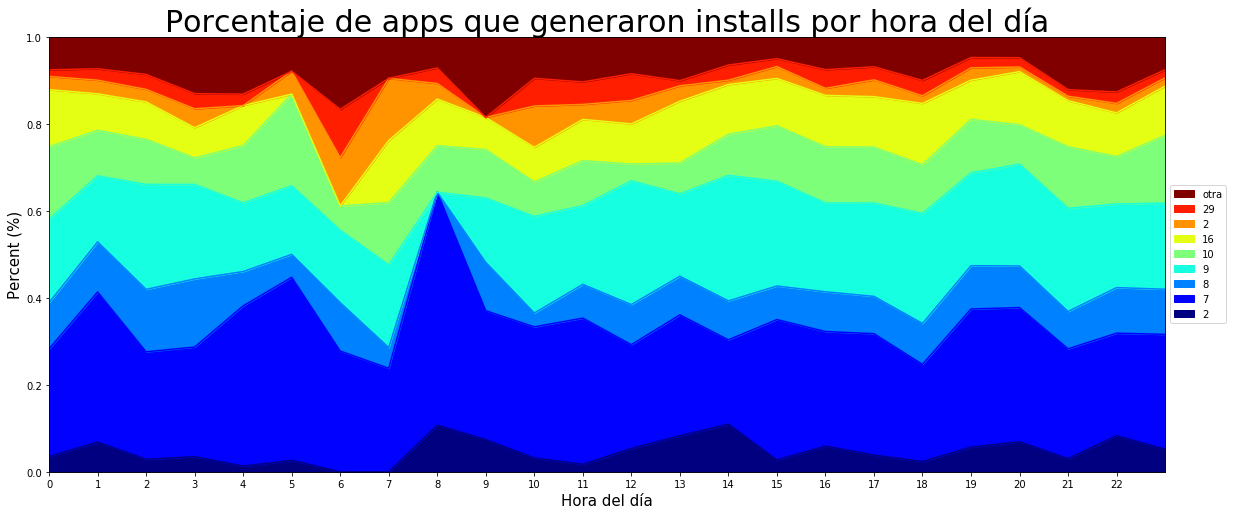

In [241]:
gy = pd.DataFrame(installs.groupby([(installs['created'].dt.hour), 'application_id']).size())
gy.columns = ['cant']
gy.reset_index(inplace = True)
pivoted = pd.pivot_table(gy,values='cant',columns='application_id', index=('created'))
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)
pivoted.columns = ['2', '7','8','9','10','16', '2', '29', 'otra']
f = plt.figure()
plt.title('Porcentaje de apps que generaron installs por hora del día',size=30)
ax = pivoted.plot(kind='area', stacked=True,figsize=(20,8),ax=f.gca(),colormap='jet')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Percent (%)', size = 15);
ax.set_xlabel('Hora del día', size = 15);
ax.set_ylim(0,1)
plt.xticks(np.arange(0, 23, step=1))
plt.show()
#CHEQUEAR COLORES

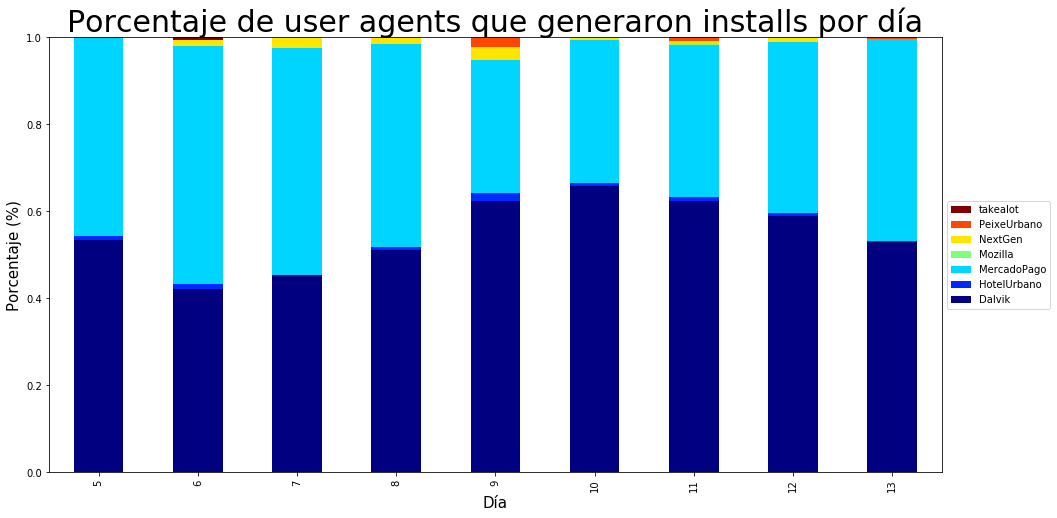

In [265]:
us = pd.DataFrame(user_agents.groupby([(user_agents['created'].dt.day), 'user_agent']).size())
us.columns = ['cant']
us.reset_index(inplace = True)
piv = pd.pivot_table(us, values = 'cant', columns = 'user_agent', index = 'created')
piv = piv.divide(piv.sum(axis = 1), axis = 0)
piv.columns = ['Dalvik', 'HotelUrbano', 'MercadoPago', 'Mozilla', 'NextGen', 'PeixeUrbano', 'takealot']
f = plt.figure()
plt.title('Porcentaje de user agents que generaron installs por día',size=30)
ax = piv.plot(kind='bar', stacked=True,figsize=(16,8),ax=f.gca(),colormap='jet')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Porcentaje (%)', size = 15);
ax.set_xlabel('Día', size = 15);
ax.set_ylim(0,1)
plt.show()

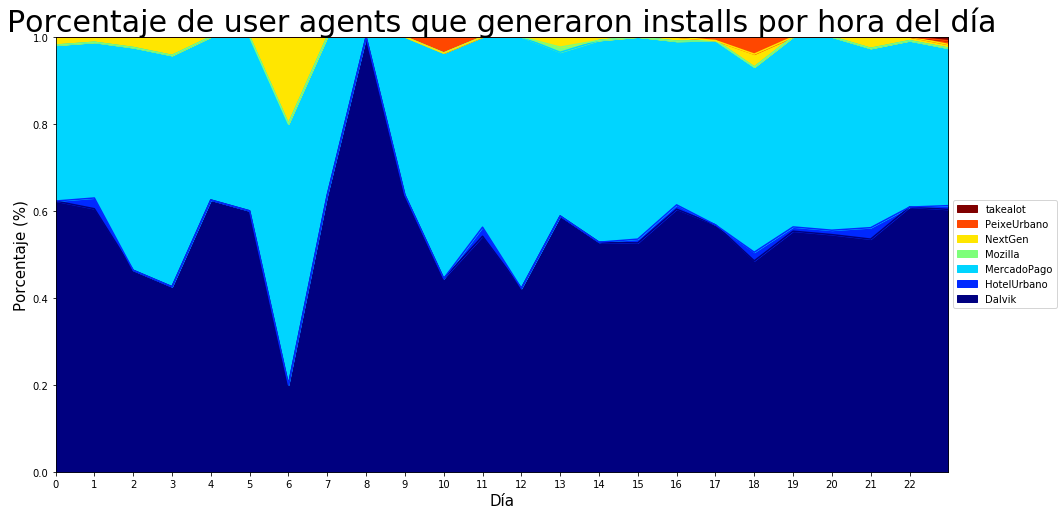

In [243]:
us = pd.DataFrame(user_agents.groupby([(user_agents['created'].dt.hour), 'user_agent']).size())
us.columns = ['cant']
us.reset_index(inplace = True)
piv = pd.pivot_table(us, values = 'cant', columns = 'user_agent', index = 'created')
piv = piv.divide(piv.sum(axis = 1), axis = 0)
piv.columns = ['Dalvik', 'HotelUrbano', 'MercadoPago', 'Mozilla', 'NextGen', 'PeixeUrbano', 'takealot']
f = plt.figure()
plt.title('Porcentaje de user agents que generaron installs por hora del día',size=30)
ax = piv.plot(kind='area', stacked=True,figsize=(16,8),ax=f.gca(),colormap='jet')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Porcentaje (%)', size = 15);
ax.set_xlabel('Día', size = 15);
ax.set_ylim(0,1)
plt.xticks(np.arange(0, 23, step=1))
plt.show()

In [244]:
implicit = installs[installs['implicit'] == True]

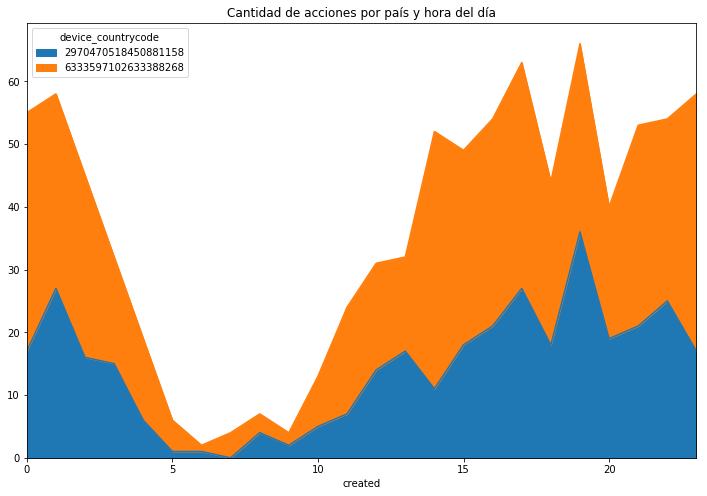

In [247]:
paises = implicit[['created', 'device_countrycode']].groupby(implicit['created'].dt.hour).agg({'device_countrycode' : 'value_counts'})
paises['device_countrycode'].unstack().plot.area(figsize = (12,8), title = 'Cantidad de acciones por país y hora del día')
plt.show()

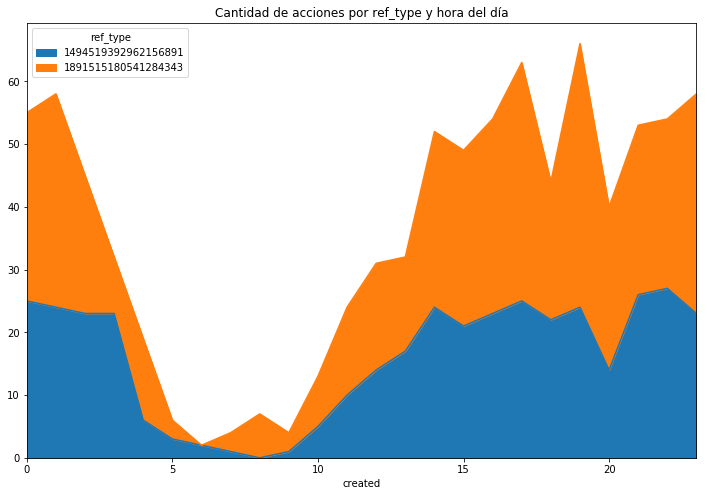

In [248]:
paises = implicit[['created', 'ref_type']].groupby(implicit['created'].dt.hour).agg({'ref_type' : 'value_counts'})
paises['ref_type'].unstack().plot.area(figsize = (12,8), title = 'Cantidad de acciones por ref_type y hora del día')
plt.show()

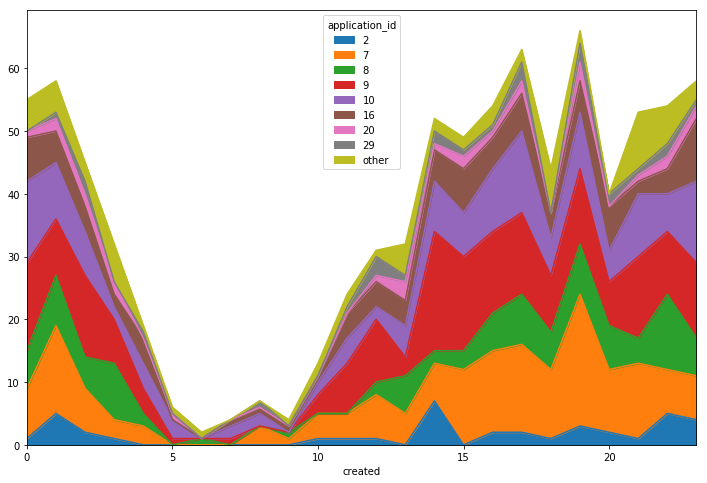

In [249]:
#Gráfico de cantidad de acciones por hora del día y por aplicación.
app = implicit[['created','application_id']].groupby([implicit['created'].dt.hour]).agg({'application_id' : 'value_counts'})
app['application_id'].unstack().plot.area(figsize = (12, 8))
plt.show()

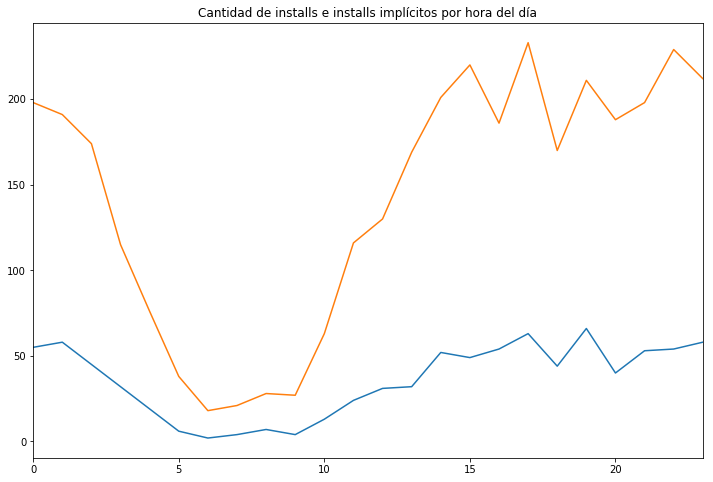

In [250]:
times = implicit['created'].dt.hour
q = times.value_counts()
ax = q.sort_index().plot(figsize = (12,8))
installs['created'].dt.hour.value_counts().sort_index().plot(figsize = (12,8), title = 'Cantidad de installs e installs implícitos por hora del día', ax = ax)
plt.show()

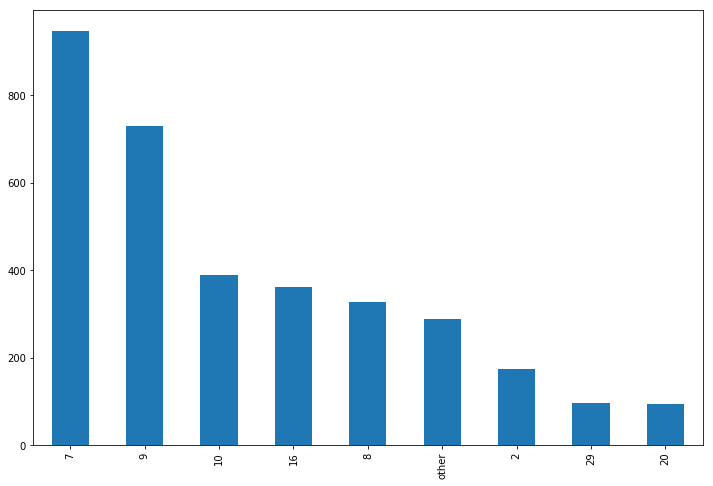

In [251]:
installs['application_id'].value_counts().plot(kind = 'bar', figsize = (12,8))
plt.show()

In [254]:
copy = installs
counts = copy['device_language'].value_counts()
indexes = counts[counts<100].index
mask_dict = dict.fromkeys(indexes, 'other')
copy['device_language'] = copy['device_language'].replace(mask_dict)
copy['device_language'].value_counts()

3.3013777759776993e+18    1484
9.0283826551012e+18        714
4.621024053086952e+18      632
other                      310
6.977049253562486e+18      238
Name: device_language, dtype: int64

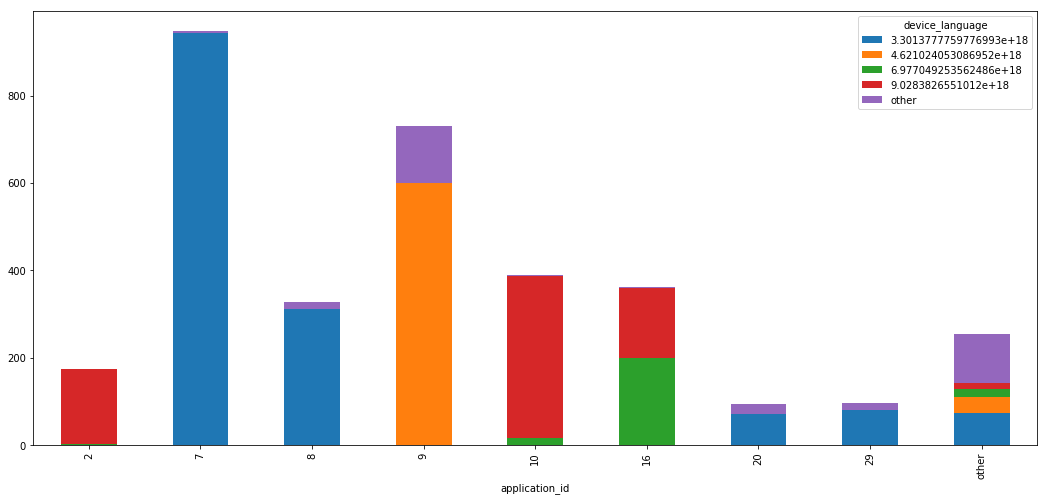

In [255]:
langs = installs[['application_id', 'device_language']].groupby('application_id').agg({'device_language' : 'value_counts'})
langs['device_language'].unstack().plot(kind = 'bar', stacked = True, figsize = (18,8))
plt.show()

In [258]:
top5apps = installs[installs['application_id'].isin([7,9,10,16,8])]
top5apps[top5apps['application_id'] == 16]['device_language'].value_counts()

6.977049253562486e+18    199
9.0283826551012e+18      160
other                      3
Name: device_language, dtype: int64

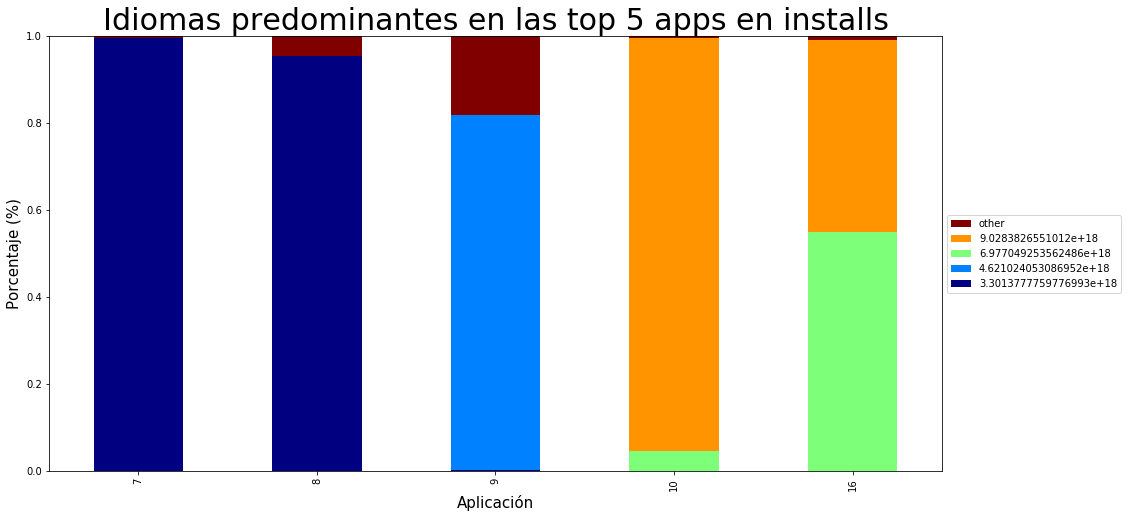

In [260]:
us = pd.DataFrame(top5apps.groupby(['application_id', 'device_language']).size())
us.columns = ['cant']
us.reset_index(inplace = True)
piv = pd.pivot_table(us, values = 'cant', columns = 'device_language', index = 'application_id')
piv = piv.divide(piv.sum(axis = 1), axis = 0)
piv.columns = ['3.3013777759776993e+18', '4.621024053086952e+18', '6.977049253562486e+18', '9.0283826551012e+18', 'other']
f = plt.figure()
plt.title('Idiomas predominantes en las top 5 apps en installs',size=30)
ax = piv.plot(kind='bar', stacked=True,figsize=(16,8),ax=f.gca(),colormap='jet')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Porcentaje (%)', size = 15);
ax.set_xlabel('Aplicación', size = 15);
ax.set_ylim(0,1)
plt.show()

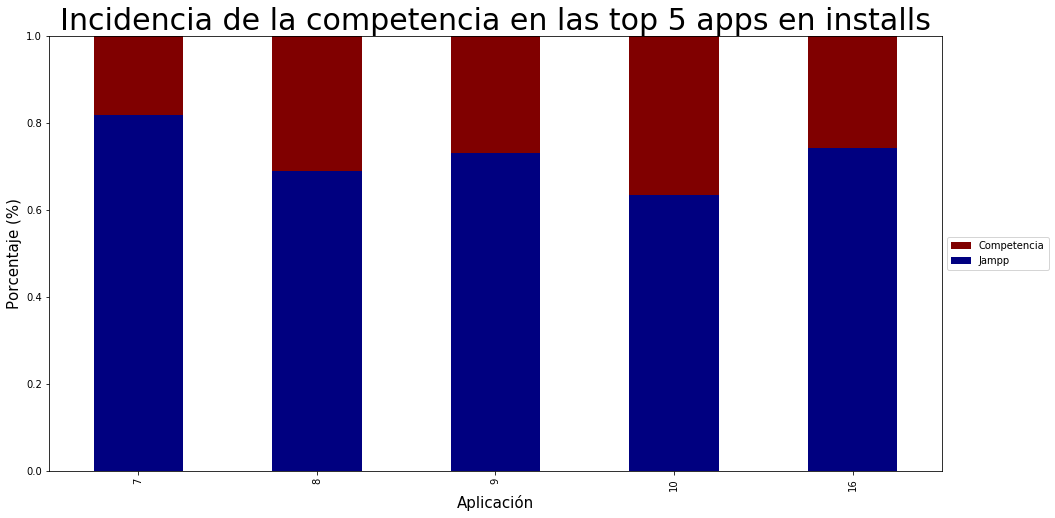

In [261]:
us = pd.DataFrame(top5apps.groupby(['application_id', 'implicit']).size())
us.columns = ['cant']
us.reset_index(inplace = True)
piv = pd.pivot_table(us, values = 'cant', columns = 'implicit', index = 'application_id')
piv = piv.divide(piv.sum(axis = 1), axis = 0)
piv.columns = ['Jampp', 'Competencia']
f = plt.figure()
plt.title('Incidencia de la competencia en las top 5 apps en installs',size=30)
ax = piv.plot(kind='bar', stacked=True,figsize=(16,8),ax=f.gca(),colormap='jet')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Porcentaje (%)', size = 15);
ax.set_xlabel('Aplicación', size = 15);
ax.set_ylim(0,1)
plt.show()

In [275]:
installs.head()

,created,application_id,ref_type,implicit,device_countrycode,device_brand,device_model,user_agent,kind,wifi,ip_address,device_language
0,2019-03-13 01:43:33.445,other,1891515180541284343,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,other,1891515180541284343,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,other,1891515180541284343,True,6333597102633388268,5.137992e+17,6.026543e+18,NaN,Open,NaN,4636407223847323867,3.3013777759776993e+18
3,2019-03-13 04:20:57.698,other,1891515180541284343,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,other,1891515180541284343,True,6333597102633388268,1.083369e+18,7.876612e+18,NaN,Open,NaN,685400811232710215,3.3013777759776993e+18


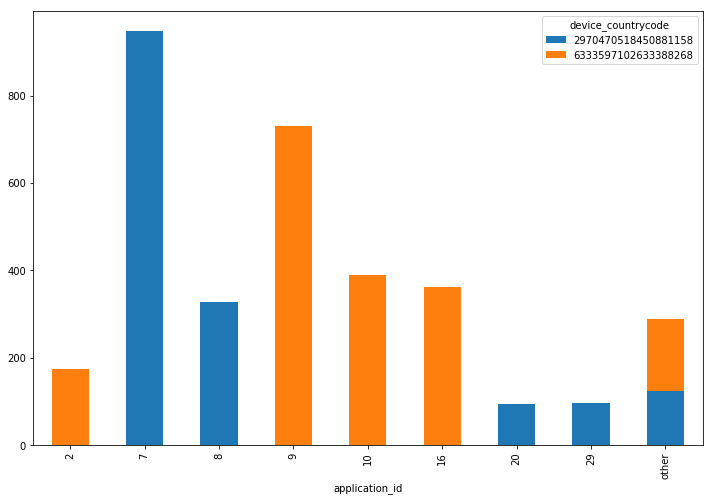

In [273]:
paises = installs[['application_id', 'device_countrycode']].groupby('application_id').agg({'device_countrycode' : 'value_counts'})
paises['device_countrycode'].unstack().plot(kind = 'bar',stacked = True, figsize = (12,8))
plt.show()

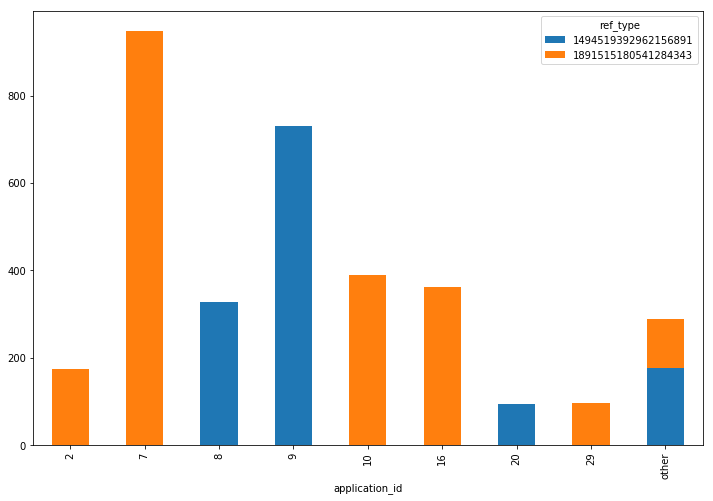

In [285]:
types = installs[['application_id', 'ref_type']].groupby('application_id').agg({'ref_type' : 'value_counts'})
types['ref_type'].unstack().plot(kind = 'bar',stacked = True, figsize = (12,8))
plt.show()

In [ ]:
#Gráfico de cantidad de acciones por aplicación
apps = implicit['application_id']
r = apps.value_counts()
r.plot(kind = 'bar', figsize = (12,8))
plt.show()

In [ ]:
insvsimpl = installs[['application_id', 'implicit']].groupby('application_id').agg({'implicit': 'value_counts'})
insvsimpl['implicit'].unstack().plot(kind = 'bar', figsize = (18,8))
plt.show()

In [ ]:
appi = installs[['ref_type','application_id']].groupby('application_id').agg({'ref_type' : 'value_counts'})
appi['ref_type'].unstack().plot(kind = 'bar', stacked = True, figsize = (18, 8))
plt.show()

In [ ]:
app = implicit[['ref_type','application_id']].groupby('application_id').agg({'ref_type' : 'value_counts'})
app['ref_type'].unstack().plot(kind = 'bar', stacked = True, figsize = (12, 8)).legend(loc = 'best')
plt.show()

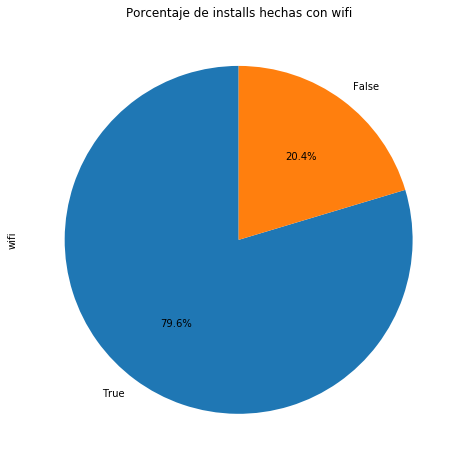

In [264]:
installs['wifi'].value_counts(normalize = True).plot(kind = 'pie', figsize = (12,8), title = 'Porcentaje de installs hechas con wifi', autopct = '%1.1f%%', startangle = 90)
plt.show()

In [ ]:
#Gráfico de cantidad de por marca y por aplicación
brands = implicit[['application_id', 'device_brand']].groupby('device_brand').agg({'application_id' : 'value_counts'})
brands['application_id'].unstack().plot(kind = 'bar', figsize = (20,8))
plt.show()

In [ ]:
models = installs[['application_id', 'ref_type', 'implicit']].groupby(['application_id','ref_type']).agg({'implicit' : 'mean'})
positive = models[models['implicit'] != 0]
positive['implicit'].unstack().plot(kind = 'bar', stacked = True, figsize = (12,8), title = 'Porcentaje de acciones tomadas por ref_type y por aplicación')
plt.show()

In [ ]:
#Gráfico de tipos de acciones
implicit['kind'].value_counts().plot(kind = 'bar', figsize = (12,8))
plt.show()

In [ ]:
copia = implicit
counts = copia['kind'].value_counts()
indexes = counts[counts<15].index
mask_dict = dict.fromkeys(indexes, 'other')
copy['kind'] = copy['kind'].replace(mask_dict)
copy['kind'].value_counts()

In [ ]:
implicit['kind'].value_counts().nsmallest(12).sum()

In [ ]:
#Gráfico de cantidad acciones de por tipo y por aplicación
brands = implicit[['application_id', 'kind']].groupby('application_id').agg({'kind' : 'value_counts'})
brands['kind'].unstack().plot(kind = 'bar', stacked = True, figsize = (18,10))
plt.show()

In [ ]:
types = implicit[['ref_type', 'kind']].groupby('kind').agg({'ref_type' : 'value_counts'})
types['ref_type'].unstack().plot(title = 'ref_types por tipo de acción', kind = 'barh', stacked = True, figsize = (12,10))
plt.show()

In [ ]:
kinds = implicit[['session_user_agent', 'kind']].groupby('kind').agg({'session_user_agent' : 'value_counts'})
kinds['session_user_agent'].unstack().plot(title = 'Session User Agent por tipo de acción', kind = 'barh', stacked = True, figsize = (12,10))
plt.show()

In [ ]:
paises = implicit[['device_countrycode', 'ref_type']].groupby('device_countrycode').agg({'ref_type' : 'value_counts'})
paises['ref_type'].unstack().plot(kind = 'barh', figsize = (12,9), title = 'Cantidad de acciones por país y ref_type')
plt.show()

In [ ]:
des_paises = implicit[['device_countrycode', 'kind']].groupby('device_countrycode').agg({'kind' : 'value_counts'})
des_paises['kind'].unstack().plot(kind = 'barh', figsize = (12,8))
plt.show()

In [ ]:
kinds = implicit[['kind', 'device_countrycode']].groupby('kind').agg({'device_countrycode' : 'value_counts'})
kinds['device_countrycode'].unstack().plot(kind = 'bar', stacked = True, figsize = (12,8), title = 'Tipo de acción por país')
plt.show()

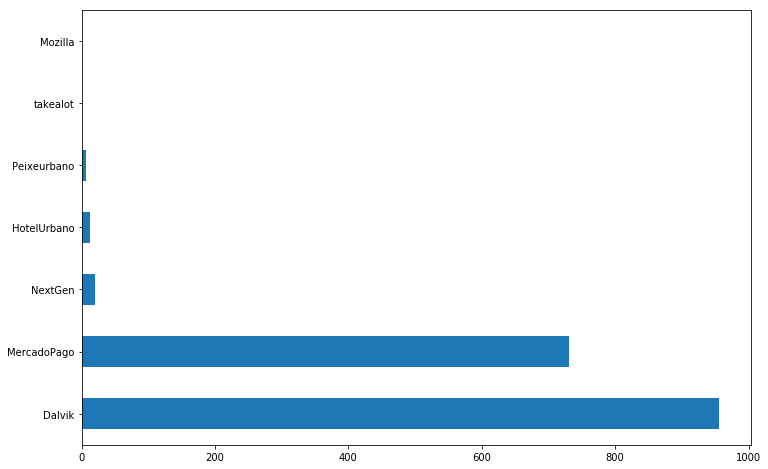

In [283]:
user_agents['user_agent'].value_counts().plot(kind = 'barh', figsize = (12,8))
plt.show()